In [1]:
import arxiv
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [2]:
search = arxiv.Search(
  query = "Machine Learning",
  max_results = 100,
  sort_by = arxiv.SortCriterion.SubmittedDate
)

papers = {}

for result in arxiv.Client().results(search):
    papers[result.title] = result.summary

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
stop = nltk.corpus.stopwords.words('english')
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in list(papers.values())]       

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/derekwu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/derekwu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


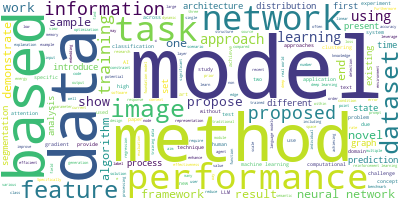

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers.values()))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [5]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel

In [6]:
# Create Dictionary
id2word = corpora.Dictionary(doc_clean)
corpus = [id2word.doc2bow(text) for text in doc_clean]

In [7]:
# Set number of topics
num_topics = 10
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=10, alpha='auto', per_word_topics=True)

In [8]:
from pprint import pprint
for index, topic in lda_model.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

Topic: 0 
Words: ['model', 'method', 'data', 'information', 'algorithm', 'learning', 'gradient', 'show', 'network', 'agent', 'cardiac', 'concept', 'time', 'neural', 'proposed', 'using', 'performance', 'clipping', 'approach', 'work', 'class', 'also', 'propose', 'often', 'computational', 'deep', 'healthcare', 'dp', 'result', 'motion']
Topic: 1 
Words: ['cycle', 'information', 'graph', 'distribution', 'network', 'feature', 'segmentation', 'shift', 'model', 'method', 'dynamic', 'spherical', 'proposed', 'structure', 'invariant', 'transforms', 'pattern', 'incontext', 'spatiotemporal', 'propose', 'data', 'group', 'specifically', 'semantic', 'modality', 'stable', 'via', 'module', 'multiple', 'gpus']
Topic: 2 
Words: ['clustering', 'model', 'learning', 'problem', 'graph', 'distribution', 'training', 'show', 'llm', 'task', 'sample', 'optimization', 'method', 'first', 'using', 'performance', 'control', 'function', 'based', 'benchmark', 'deep', 'parameter', 'feature', 'classification', 'result', '

In [9]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [10]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)

In [11]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.027782  0.010713       1        1  20.872514
0      0.087137 -0.041025       2        1  13.312480
5      0.117718 -0.080809       3        1  12.029727
8      0.056972  0.158252       4        1  11.110214
2     -0.071270  0.045564       5        1   9.723548
6     -0.023998  0.007077       6        1   7.614181
1     -0.104393 -0.064021       7        1   7.100190
4      0.007598 -0.018836       8        1   6.474788
7     -0.051137  0.028351       9        1   6.098183
9     -0.046408 -0.045266      10        1   5.664176, topic_info=            Term       Freq      Total Category  logprob  loglift
607        graph  39.000000  39.000000  Default  30.0000  30.0000
36         image  32.000000  32.000000  Default  29.0000  29.0000
2266  clustering  17.000000  17.000000  Default  28.0000  28.0000
986      concept  20.000000  20.000000  Default  27.0000  27.0000
216      feature  35.000000  35.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
110     analysis   2.711198  23.410195  Topic10  -5.4767   0.7152
159      machine   2.711389  25.360146  Topic10  -5.4767   0.6353
62       propose   2.680636  28.529358  Topic10  -5.4881   0.5061
230       result   2.705468  36.288422  Topic10  -5.4788   0.2748
227       method   2.659060  74.459849  Topic10  -5.4962  -0.4613

[653 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
492       2  0.178940        2d
492       9  0.536820        2d
492      10  0.178940        2d
1145      8  0.164480        3d
1145      9  0.411199        3d
...     ...       ...       ...
96       10  0.033919      work
1777      1  0.939633  workflow
2062      3  0.236415       xai
2062      8  0.236415       xai
2062     10  0.472829       xai

[1343 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 6, 9, 3, 7, 2, 5, 8, 10])

In [12]:
pprint(list(papers.keys()))

['SEGIC: Unleashing the Emergent Correspondence for In-Context Segmentation',
 'Differentiable and accelerated spherical harmonic and Wigner transforms',
 'Understanding Self-Supervised Features for Learning Unsupervised Instance '
 'Segmentation',
 'The mass profiles of dwarf galaxies from Dark Energy Survey lensing',
 'Convergence Analysis for Learning Orthonormal Deep Linear Neural Networks',
 'JetLOV: Enhancing Jet Tree Tagging through Neural Network Learning of '
 'Optimal LundNet Variables',
 'Data-driven Prior Learning for Bayesian Optimisation',
 'One Pass Streaming Algorithm for Super Long Token Attention Approximation in '
 'Sublinear Space',
 'Learning in Deep Factor Graphs with Gaussian Belief Propagation',
 'Calibrated Language Models Must Hallucinate',
 'Evidence for $B^{+}\\to K^{+}ν\\barν$ Decays',
 'More is Better in Modern Machine Learning: when Infinite '
 'Overparameterization is Optimal and Overfitting is Obligatory',
 'A General Framework for User-Guided Bayesian 